# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных 22 столбца. В них встречаются 4 типа данных: bool (в двух столбцах), float64 (в 14 столбцах), int64 (в трех столбцах) и object (в трех столбцах).

Согласно документации данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

В данных имеется большое количество пропусков. Столбец `is_apartment` должен иметь тип данных bool, но имеет тип данных object. Столбец `first_day_exposition` содержит дату, поэтому его следует перевести в datetime. 

### Вывод

В каждой строке таблицы дана информация из объявлений о продаже квартир в Санкт-Петербурге и его окресностях. Данные делятся на два типа: полученные от пользователя и автоматически из картографических данных. Информации много, однако имеется много пропусков. Для достижения поставленной задачи, необходимо будет привести данные в соответствие, а также рассчитать цену квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры, соотношение жилой и общей площади и отношение площади кухни к общей.

## Предобработка данных

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

Сначала проверили, все ли названия колонок df соответствуют правилу хорошего тона. После этого я заменила `cityCenters_nearest` на `city_centers_nearest` и добавила знак `_` между словом и цифрой в названиях `parks_around3000` и `ponds_around3000`

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных имеется много пропусков, в основном в тех столбцах, где данные загружались автоматически, такие как расстояния до парка, водоема, аэропорта и центра. Такие пропуски мы не сможем заполнить и указать точно, так как не знаем точное расположение квартир. Также невозможно заменить пропуски в столбце с количеством этажей.

Но есть пропуски, которые можно заполнить. Например, если пользователи не указали количество балконов, можно предположить, что их нет и заменить пропуски на 0. Также можно предположить, что раз пользователь не указал, что это апартаменты, то значит, что это обычная квартира.

In [8]:
df['balcony'] = df['balcony'].fillna(0)

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Логично было бы предположить, что жилая площадь и площадь кухни зависят от общей площади квартиры. Можно найти, какую долю примерно занимают эти показатели от общей площади, взяв медианное значение, и заполнить пустые значения, умножив общую площадь на эту долю.

In [10]:
living_area_percent = df['living_area'] / df['total_area']
living_area_percent.median()

0.5678598992678503

In [11]:
living_area_percent

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697         NaN
23698    0.380805
Length: 23699, dtype: float64

In [12]:
df['living_area'] = df['living_area'].fillna(living_area_percent.median() * df['total_area'])

In [13]:
kitchen_area_percent = df['kitchen_area'] / df['total_area']
kitchen_area_percent.median()

0.1724137931034483

In [14]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_percent.median())

In [15]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

В столбце `rooms` есть аномальное значение: 0. Возможно, пользователь не ввел эти данные, и их можно считать за неявные пропуски, которые заменили значением по умолчанию. 

Мы знаем, что студии - это однокомнатные квартиры без перегородок. Поэтому, если мы знаем, что это квартира-студия, то было бы логично поменять в них количество комнат на 1.

In [16]:
df[(df['studio'] == True) & (df['rooms'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.500000,2,False,...,4.655172,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.750000,4,False,...,4.674138,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,14.196497,7,False,...,4.310345,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.500000,21,False,...,4.155172,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.000000,1,False,...,2.931034,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.200000,5,False,...,5.172414,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.000000,10,False,...,4.827586,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.000000,16,False,...,4.482759,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,14.764357,8,False,...,4.482759,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [17]:
df.loc[(df['studio'] == True) & (df['rooms'] == 0), 'rooms'] = 1
df[(df['studio'] == True) & (df['rooms'] == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,1,NaN,24.0,15.500000,2,False,...,4.655172,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,1,NaN,17.0,24.750000,4,False,...,4.674138,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,1,NaN,10.0,14.196497,7,False,...,4.310345,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,1,2.75,25.0,17.500000,21,False,...,4.155172,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,1,2.70,9.0,12.000000,1,False,...,2.931034,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,1,NaN,25.0,18.200000,5,False,...,5.172414,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,1,2.70,19.0,18.000000,10,False,...,4.827586,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,1,NaN,25.0,18.000000,16,False,...,4.482759,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,1,NaN,19.0,14.764357,8,False,...,4.482759,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Высота потолков имеет свой нижний предел, но может варьироваться вне зависимости от этажности дома или площади квартиры. Поэтому можно заполнить пропуски медианным значением. Установить точно, сколько этажей в доме, тоже не предоставляется возможным. 

In [20]:
df.duplicated().sum()

0

Явных дубликатов в данных не обнаружено.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')

В столбце `first_day_exposition` представлены даты, когда объявление было опубликовано, поэтому я изменила тип данных на `datetime64`. В остальных столбцах, которые понадобятся для расчетов, я поменяла на `int64`, для увеличения точности. 

**Вывод**

В предобработке данных мы привели поменяли названия столбцов к корректным. Также заполнили пропуски в данных там, где это было возможно, а именно: заменили пропуски в количество балконов на 0, а пропуски в столбце `is_apartment` на False. Также расчитали примерную площадь жилого помещения и кухни, поменяли количество комнат в студиях на 1 и заполнили пропуски высоте потолков медианным значением. После заполнения пропусков, проверили наличие дубликатов. Их в данных не оказалось. После привели типы данных в стобцах `first_day_exposition`, `last_price`, `balcony` в соответствие.  

## Расчёты и добавление результатов в таблицу

In [24]:
# расчет цены квадратного метра

df['metre_cost'] = (df['last_price'] / df['total_area']).round()

In [25]:
# определение дня недели, месяца и года публикации

df['week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

In [26]:
# категоризация этажа квартиры

def floor_group(row):
    floor = row['floor']
    floor_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(floor_group, axis=1)

In [27]:
df['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [28]:
# расчет соотношения жилой площади и площади кухни к общей площади

df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kinchen_area_ratio'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Text(0, 0.5, 'Количество')

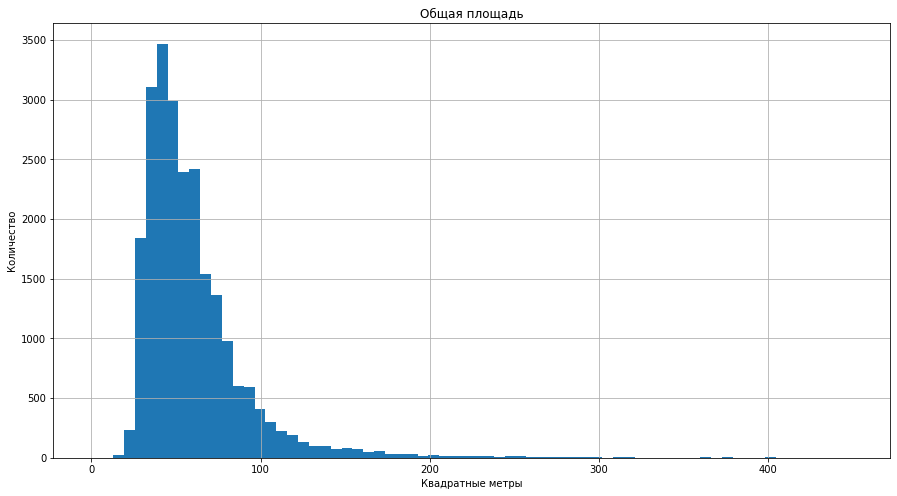

In [29]:
# гистограмма площади

df['total_area'].hist(bins=70, range=(0, 450), figsize=(15, 8))

plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество')

Большая часть значений находится в промежутке между 40 и 60 кв.м. Имеются очень большие редкие значения.

Text(0, 0.5, 'Количество')

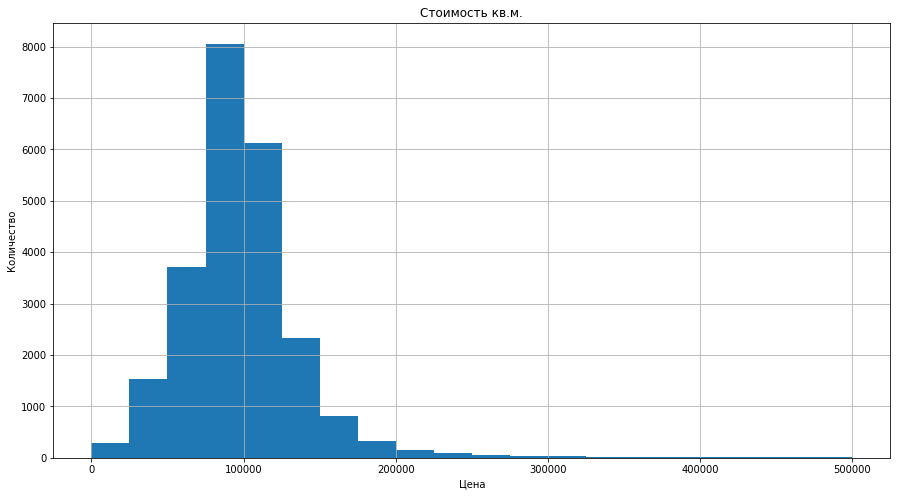

In [31]:
# гистограмма цены

df['metre_cost'].hist(bins=20, range=(0, 500000), figsize=(15, 8))

plt.title('Стоимость кв.м.')
plt.xlabel('Цена')
plt.ylabel('Количество')

Большинство значений в промежутке от 80000 до 100000 руб за кв м. Также присутствуют редкие большие значения

Text(0, 0.5, 'Количество')

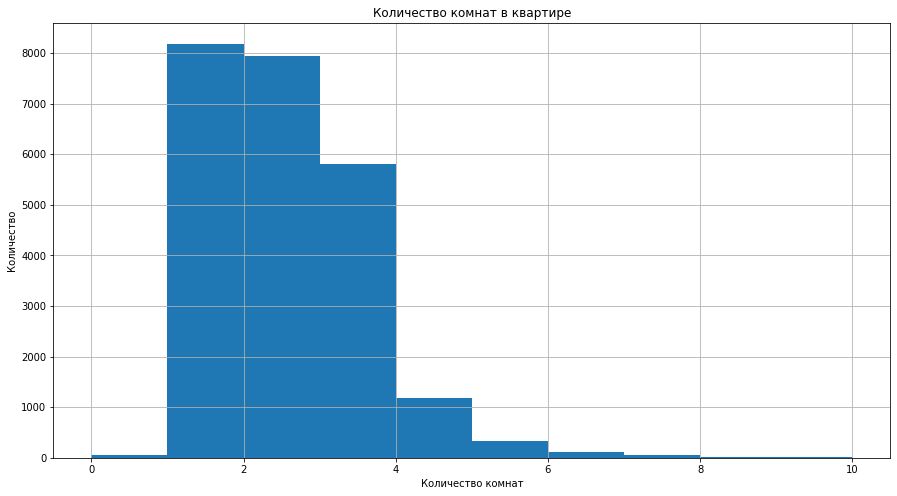

In [32]:
# гистограмма комнат

df['rooms'].hist(bins=10, range=(0,10), figsize=(15, 8))

plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')

Большая часть значений находится в диапозоне от 1 до 4 комнат, есть выбивающиеся значения.

Text(0, 0.5, 'Количество')

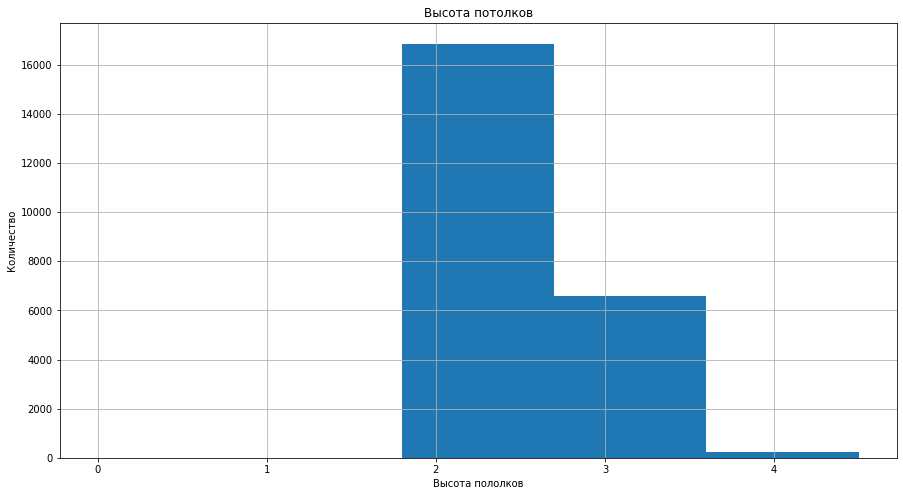

In [33]:
# гистограмма высоты потолков

df['ceiling_height'].hist(bins=5, range=(0,4.5), figsize=(15, 8))

plt.title('Высота потолков')
plt.xlabel('Высота пололков')
plt.ylabel('Количество')

Большая часть значений находится от 1,8 метров, есть квартиры с высотой потолков от трех метров, что может соответствовать действительности. Однако есть редкие значения от четырех метров

**Вывод**

Мы построили гистограммы по нескольким показателям: общая площадь, цена, количество комнат и высота потолков. Из гистограмм видно, что большинство объявлений имеют типичные для квартир значения, однако так же видно, что есть объявления с очень большими выбивающимися значениями.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

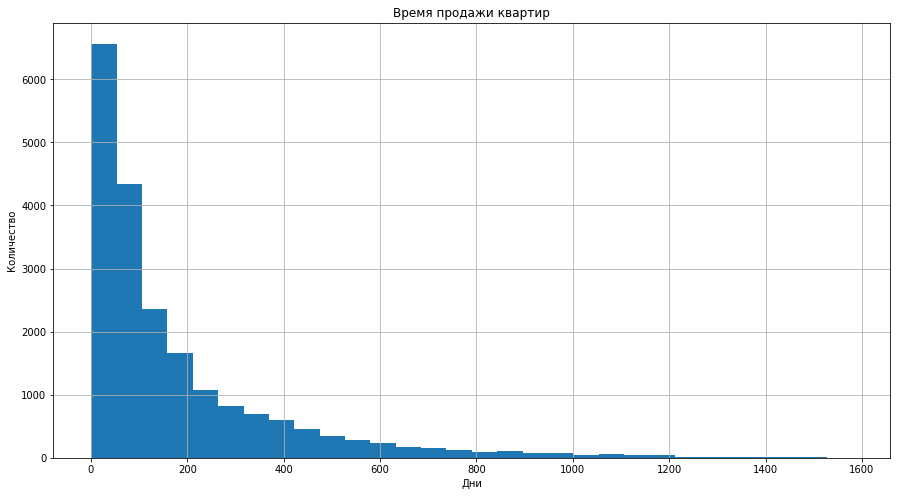

181.0
95.0


In [34]:
# изучение времени продажи квартир

df['days_exposition'].hist(bins=30, figsize=(15, 8))

plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество')

plt.show()
print(df['days_exposition'].mean().round())
print(df['days_exposition'].median())

Самое большое количество объявлений - в первые 50 дней, но мне кажется, что если посмотреть на среднюю и медиану, то можно сделать вывод что продажа квартиры за меньше чем 50 дней очень быстрая.Также есть много объявлений, где продажа квартир произошла за 50-200 дней, после 200 объявлений становится все меньше и меньше. 
Большая разница между медианой и средним, а также распределение со смещение графика вправо может говорить нам о том, что хоть и среднее значение - 181 день, но половина квартир распродана меньше чем 95 дней, а также о том, что есть очень большой заброс данных, что подтверждается очень высоким стандартным отклонением - 220.

In [35]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Для того, чтобы лучше увидеть редкие и выбивающиеся значения, построим диаграммы размаха.

<AxesSubplot:>

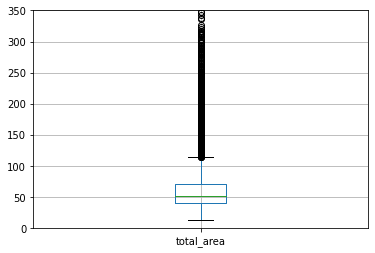

In [36]:
plt.ylim(0,350) 
df.boxplot('total_area')

75% данных находится в предлах значений до примерно 70 кв.м. Верхний ус упирается в значение 115 кв.м. Значения выше редки и их можно считать выбросом, однако судя по сплошной линии их довольно много. Помле 320 кв.м. сплошная линия прерывается, такие значения можно удалить.

<AxesSubplot:>

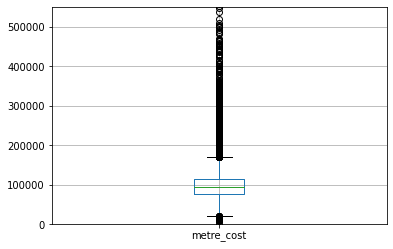

In [37]:
plt.ylim(0,550000)
df.boxplot('metre_cost')

Нижний ус упирается в примерное значение 20000, верхний - 180000. Остальных значений тоже довольно много, сплошная линия прерывается примерно на значении 520000

<AxesSubplot:>

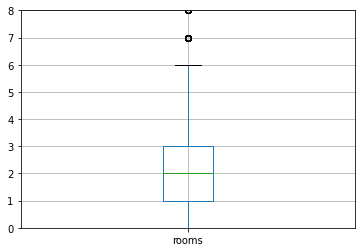

In [38]:
plt.ylim(0,8)
df.boxplot('rooms')

Верхний ус упирается в значение 6, оченеь редко встречаются значения выше - это выбросы.

<AxesSubplot:>

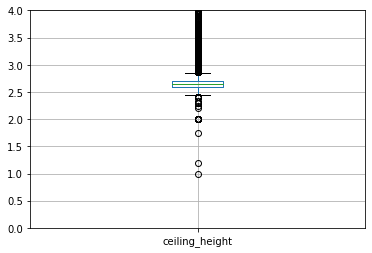

In [39]:
plt.ylim(0,4)
df.boxplot('ceiling_height')

Если посмотреть на диаграмму размаха высоты потолков, то можно сделать вывод, что потолки 3 метра это выброс, однако в элитных квартирах встречаются высокие потолки, поэтому их я удалять не буду.

In [40]:
df_new = df.query("total_area <= 320 and metre_cost <= 520000 and rooms <= 6 and ceiling_height < 4")

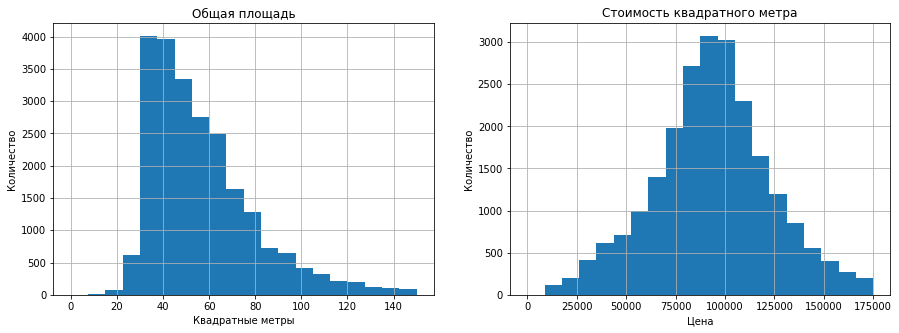

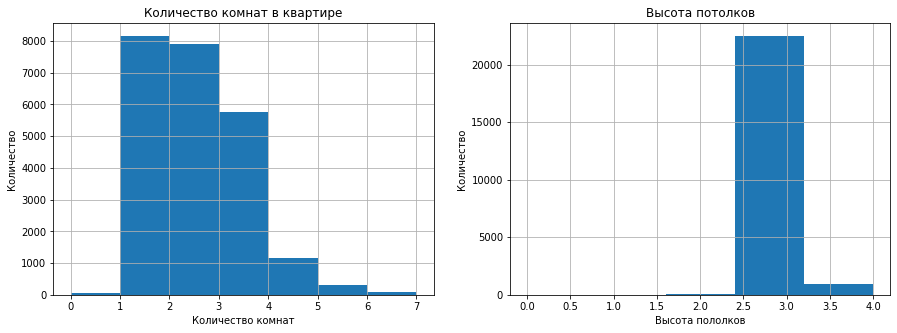

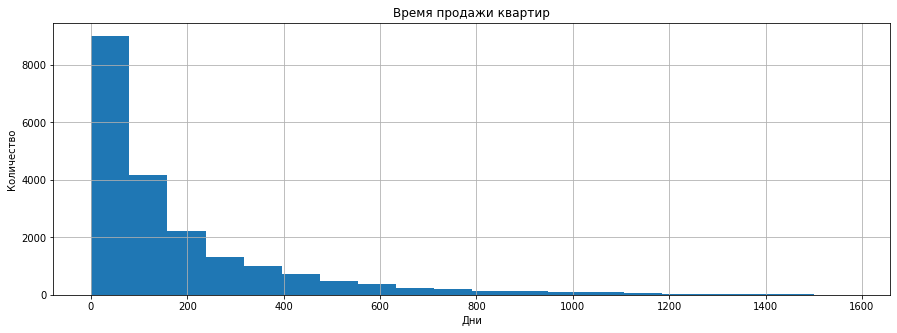

In [41]:
import pylab

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
df_new['total_area'].hist(bins=20, range=(0,150))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество')

pylab.subplot (1, 2, 2)
df_new['metre_cost'].hist(bins=20, range=(0, 175000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
df_new['rooms'].hist(bins=7, range=(0,7))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')

pylab.subplot (1, 2, 2)
df_new['ceiling_height'].hist(bins=5, range=(0,4))
plt.title('Высота потолков')
plt.xlabel('Высота пололков')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(15,5))
df_new['days_exposition'].hist(bins=20)
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

Избавившись данных с редкими и аномальными значениями, мы видим, что распределение цен стало нормальным. Поэтому дальше я буду работать с этими данными.

Большинство значений площади - примерно от 30 до 50 кв.м., большое количество однокомнатных и двухкомнатных квартир, низкая доля высоких потолков, большинство квартир продается за первые 100 дней.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [43]:
df_new['metre_cost'].corr(df_new['total_area'])

0.27388866813075274

In [44]:
df_new['metre_cost'].corr(df_new['rooms'])

0.010257721086623275

In [45]:
df_new['metre_cost'].corr(df_new['city_centers_nearest'])

-0.37199072588462667

Для того, чтобы посмотреть зависимость цены от площади, числа комнат и удаленности от центра, найдем коэффициэнт Пирсона. Из результата видно небольшую взаимосвязь между ценой и общей площадью, отсутствует связь между ценой и количеством комнат. Есть обратная связь между ценой и удаленностью от центра.

Построим для этих трех показателей диаграмму рассеяния.

<AxesSubplot:xlabel='total_area', ylabel='metre_cost'>

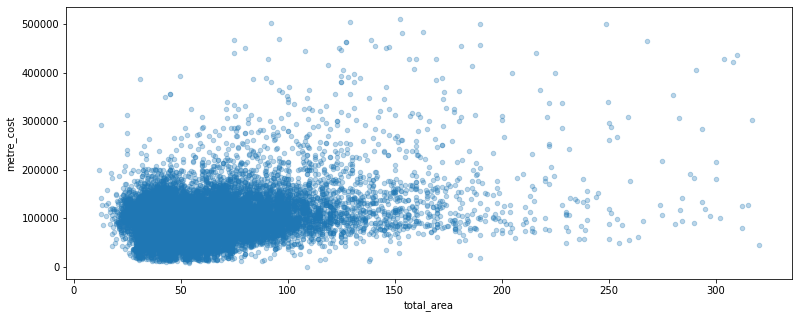

In [46]:
df_new.plot(x='total_area', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Диаграмма показывает, что сильной связи между ценой и общей площадью нет. Цена большаей части квартир варьируется до примерно 200000, независимо от общей площади.

<AxesSubplot:xlabel='rooms', ylabel='metre_cost'>

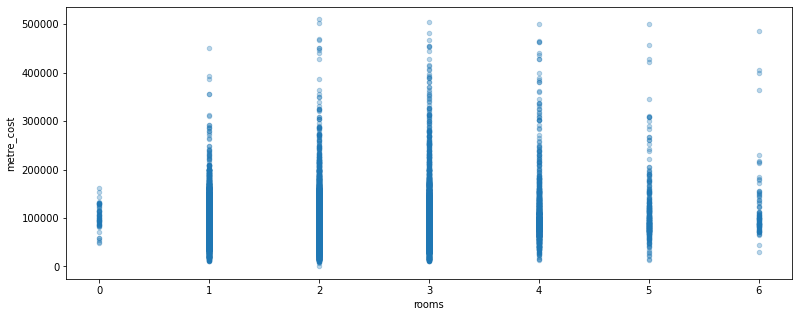

In [47]:
df_new.plot(x='rooms', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Стоимость квартир с разным числом комнат примерно одинаково.

<AxesSubplot:xlabel='city_centers_nearest', ylabel='metre_cost'>

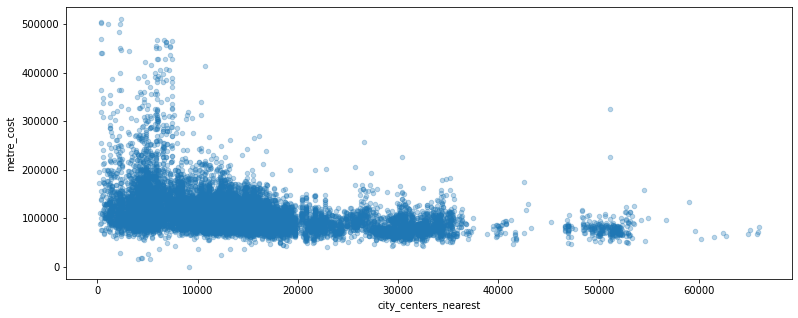

In [48]:
df_new.plot(x='city_centers_nearest', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Из диаграммы видно, что хоть и в большинстве случаев цены на квартиры примерно похожи, но также видно, что есть дорогие квартиры находящиеся ближе к центру, тогда как в более дальних таких квартир нет.

In [49]:
def pivot(data, series):
    data_pivot = pd.pivot_table(data, index=series, values='metre_cost').round()
    return data_pivot

Для отображения зависимости цены от этажа и даты публикации воспользуемся сводными таблицами, посчитаем среднее для каждого значения.

In [50]:
pivot(df_new, df_new['floor_category'])

,metre_cost
floor_category,
другой,102332.0
первый,81501.0
последний,90361.0


<AxesSubplot:xlabel='floor_category'>

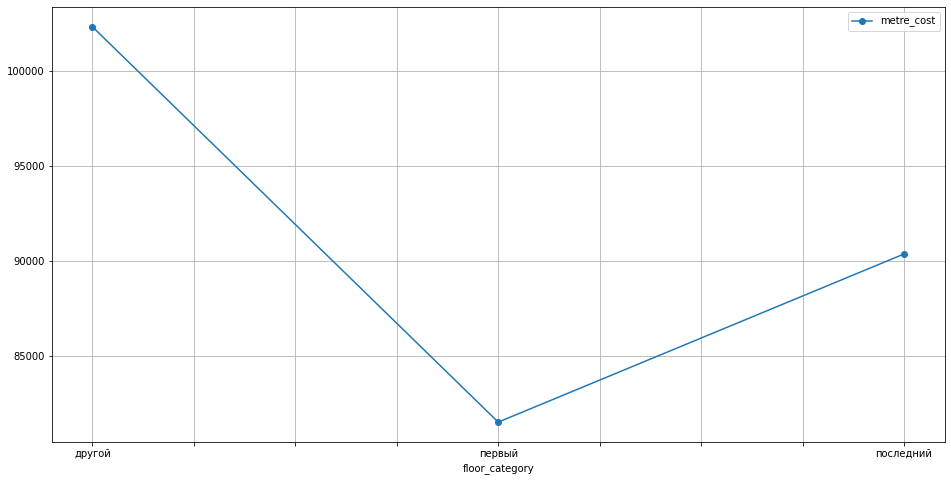

In [51]:
pivot(df_new, df_new['floor_category']).plot(style='o-', grid=True, figsize=(16, 8))

Мы видим зависимость цены от этажа. Средняя цена за квартиру на первом и последнем этажах ниже чем на других, причем на первом этаже покупать дешевле всего.

In [52]:
pivot(df_new, df_new['week_exposition'])

,metre_cost
week_exposition,
0,98221.0
1,98604.0
2,98088.0
3,98185.0
4,98422.0
5,96648.0
6,97234.0


<AxesSubplot:xlabel='week_exposition'>

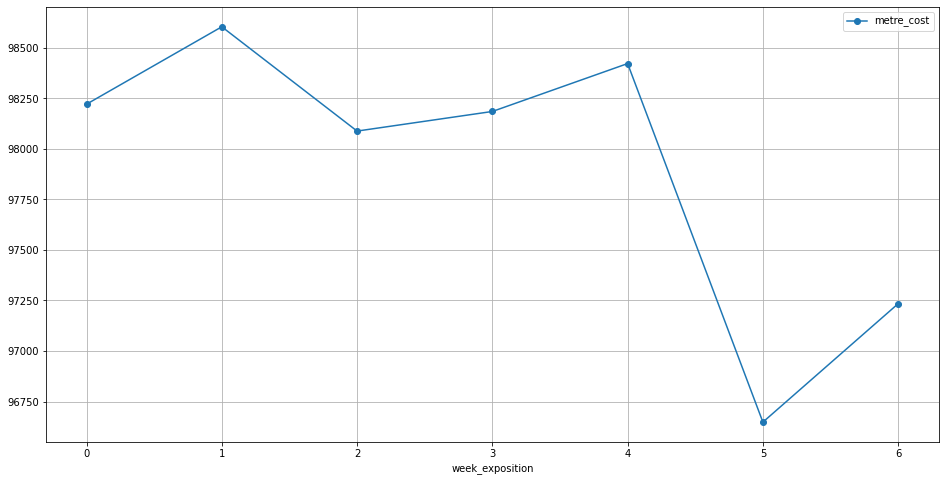

In [53]:
pivot(df_new, df_new['week_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Из графика видно, что в выходные дни цена ниже, чем в будни.

In [54]:
pivot(df_new, df_new['month_exposition'])

,metre_cost
month_exposition,
1,98830.0
2,98121.0
3,97571.0
4,99104.0
5,98124.0
6,96850.0
7,97787.0
8,99164.0
9,98831.0


<AxesSubplot:xlabel='month_exposition'>

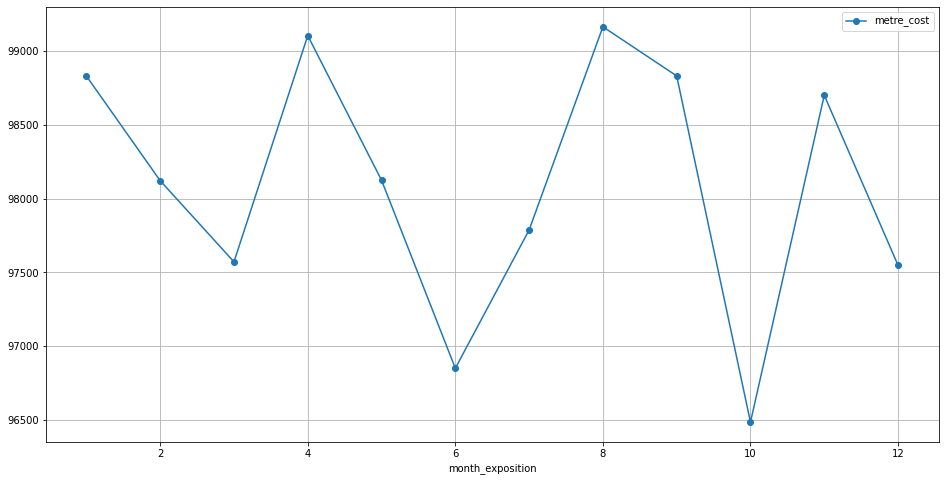

In [55]:
pivot(df_new, df_new['month_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Средняя цена в разные месяцы сильно колеблется - самая низкая была в октябре и июне, самая высокая - в апреле и августе

In [56]:
pivot(df_new, df_new['year_exposition'])

,metre_cost
year_exposition,
2014,124619.0
2015,101550.0
2016,97150.0
2017,96006.0
2018,97039.0
2019,105407.0


<AxesSubplot:xlabel='year_exposition'>

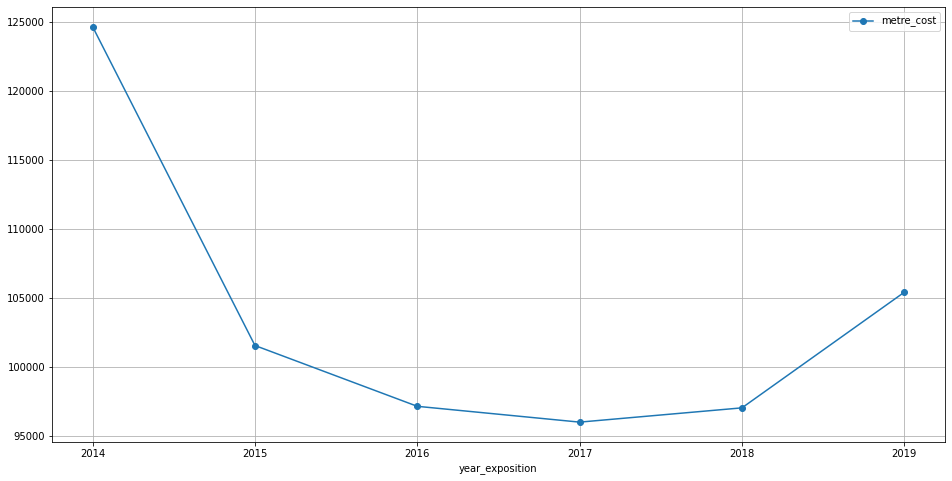

In [57]:
pivot(df_new, df_new['year_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Здесь мы видим, что цена падала каждый год, самая высокая - в 2014г, самая низкая - в 2017г, с 2018г цена начала снова расти.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.

In [59]:
town_cost = df_new.pivot_table(index='locality_name', values='metre_cost', aggfunc=['count', 'mean'])
town_cost.columns = ['count', 'metre_cost']
town_cost = town_cost.sort_values(by='count', ascending=False)
town_cost = town_cost.iloc[0:10]
town_cost

,count,metre_cost
locality_name,,
Санкт-Петербург,15504,113052.357263
посёлок Мурино,520,85725.234615
посёлок Шушары,440,78677.379545
Всеволожск,395,67104.372152
Пушкин,365,102780.446575
Колпино,337,75333.287834
посёлок Парголово,326,90332.236196
Гатчина,305,68811.337705
деревня Кудрово,299,92473.588629


Самая высокая стоимость жилья - в Санкт-Петербурге, самая низкая - в Выборге

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [60]:
saint_p = df_new.loc[df_new['locality_name'] == 'Санкт-Петербург'].reset_index()
saint_p['centre_km'] = (saint_p['city_centers_nearest'] / 1000).round()
saint_p.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,metre_cost,week_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kinchen_area_ratio,centre_km
0,0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,...,755.0,NaN,120370.0,3,3,2019,другой,0.472222,0.231481,16.0
1,2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,...,574.0,558.0,92786.0,3,8,2015,другой,0.612500,0.148214,14.0
2,3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.289724,9,...,234.0,424.0,408176.0,4,7,2015,другой,0.567860,0.172414,7.0
3,4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,...,48.0,121.0,100000.0,1,6,2018,другой,0.320000,0.410000,8.0
4,7,5,7915000,71.6,2019-04-18,2,2.65,24.0,40.658769,22,...,NaN,NaN,110545.0,3,4,2019,другой,0.567860,0.263966,12.0
5,9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.600000,7,...,NaN,289.0,88525.0,6,2,2017,другой,0.714754,0.106557,15.0
6,10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.300000,3,...,553.0,137.0,127525.0,3,11,2017,другой,0.512626,0.214646,14.0
7,15,16,4650000,39.0,2017-11-18,1,2.65,14.0,20.500000,5,...,296.0,19.0,119231.0,5,11,2017,другой,0.525641,0.194872,14.0
8,16,11,6700000,82.0,2017-11-23,3,3.05,5.0,55.600000,1,...,NaN,397.0,81707.0,3,11,2017,первый,0.678049,0.109756,11.0
9,17,6,4180000,36.0,2016-09-09,1,2.65,17.0,16.500000,7,...,859.0,571.0,116111.0,4,9,2016,другой,0.458333,0.305556,15.0


,metre_cost
centre_km,
0.0,227171.545455
1.0,145484.169591
2.0,139974.631579
3.0,119277.821752
4.0,128567.696375
5.0,137353.454857
6.0,146464.507614
7.0,153349.104116
8.0,124356.372250


<AxesSubplot:xlabel='centre_km'>

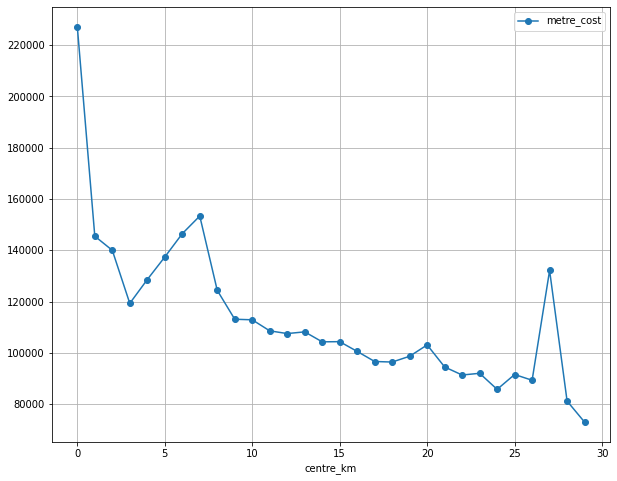

In [61]:
saint_p_mean = saint_p.pivot_table(index='centre_km', values='metre_cost')
display(saint_p_mean)
saint_p_mean.plot(style='o-', grid=True, figsize=(10,8))

Начиная с 7 км цены начали постепенно падать. Центральная зона - 0-7км. 

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [62]:
saint_p_centre = saint_p.query('centre_km <= 9').reset_index()
saint_p_centre.head(10)

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,ponds_nearest,days_exposition,metre_cost,week_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kinchen_area_ratio,centre_km
0,2,3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.289724,...,234.0,424.0,408176.0,4,7,2015,другой,0.567860,0.172414,7.0
1,3,4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,...,48.0,121.0,100000.0,1,6,2018,другой,0.320000,0.410000,8.0
2,14,24,8,6500000,97.2,2015-10-31,2,2.65,3.0,46.500000,...,124.0,265.0,66872.0,5,10,2015,первый,0.478395,0.201646,2.0
3,22,35,6,15500000,149.0,2017-06-26,5,2.65,5.0,104.000000,...,779.0,644.0,104027.0,0,6,2017,другой,0.697987,0.114094,4.0
4,32,51,7,45000000,161.0,2017-10-17,3,3.20,8.0,38.000000,...,99.0,541.0,279503.0,1,10,2017,другой,0.236025,0.310559,7.0
5,33,52,20,11795000,136.0,2017-09-22,6,3.00,2.0,94.000000,...,NaN,NaN,86728.0,4,9,2017,последний,0.691176,0.080882,7.0
6,39,61,18,7990000,74.0,2017-08-24,2,2.65,4.0,43.000000,...,NaN,609.0,107973.0,3,8,2017,последний,0.581081,0.270270,4.0
7,40,63,2,20000000,118.0,2018-09-11,3,3.00,9.0,68.000000,...,779.0,37.0,169492.0,1,9,2018,другой,0.576271,0.135593,5.0
8,42,70,9,3400000,30.0,2018-09-05,1,2.65,5.0,16.000000,...,NaN,14.0,113333.0,2,9,2018,первый,0.533333,0.233333,8.0
9,48,85,13,5200000,46.3,2018-11-26,2,3.00,5.0,27.800000,...,682.0,65.0,112311.0,0,11,2018,последний,0.600432,0.172786,9.0


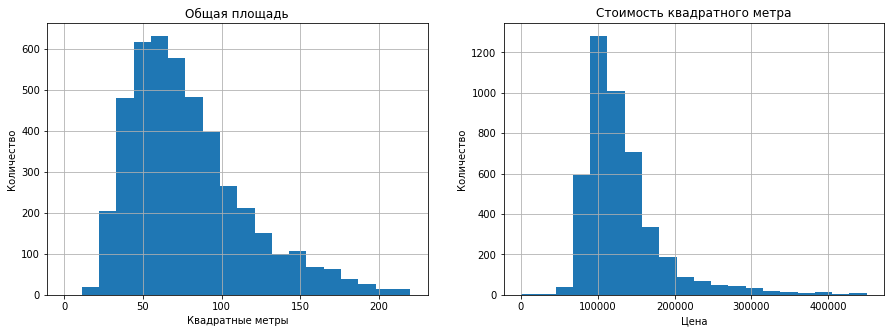

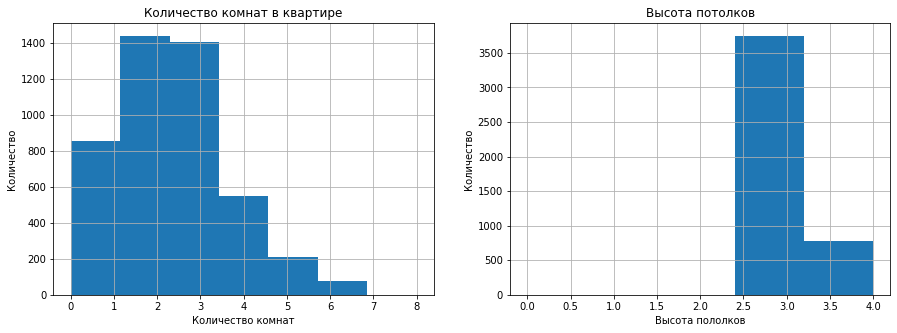

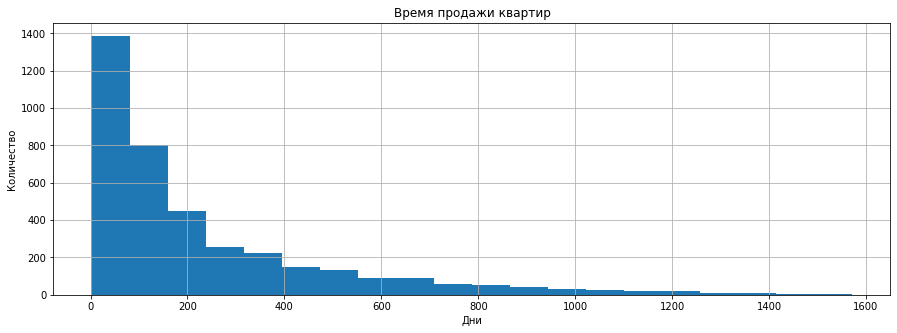

In [63]:
plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
saint_p_centre['total_area'].hist(bins=20, range=(0,220))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество')

pylab.subplot (1, 2, 2)
saint_p_centre['metre_cost'].hist(bins=20, range=(0, 450000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(15,5))
pylab.subplot (1, 2, 1)
saint_p_centre['rooms'].hist(bins=7, range=(0,8))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество')

pylab.subplot (1, 2, 2)
saint_p_centre['ceiling_height'].hist(bins=5, range=(0,4))
plt.title('Высота потолков')
plt.xlabel('Высота пололков')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(15,5))
saint_p_centre['days_exposition'].hist(bins=20)
plt.title('Время продажи квартир')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

Большинство значений площади - примерно от 40 до 75 кв.м., меньше однокомнатных больше двух и трехкомнатных квартир, доля высоких потолков выше, большинство квартир продается за первые 100 дней.

In [64]:
saint_p_centre['metre_cost'].corr(saint_p_centre['total_area'])

0.23342659506738836

In [65]:
saint_p_centre['metre_cost'].corr(saint_p_centre['rooms'])

-0.035779068939817034

In [66]:
saint_p_centre['metre_cost'].corr(saint_p_centre['city_centers_nearest'])

-0.08778085917207062

Мы видим отсутствие зависимости цены от удаленности от центра и от количества комнат. Наблюдается небольшая зависимость цены от общей площади.

<AxesSubplot:xlabel='total_area', ylabel='metre_cost'>

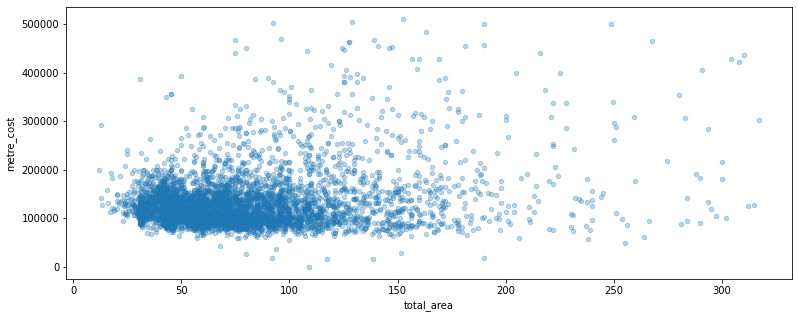

In [78]:
saint_p_centre.plot(x='total_area', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Точно также как и по общец таблице наблюдается сильный разброс, большая часть квартир стоимостью до 200000 не зависимо от площади.

<AxesSubplot:xlabel='rooms', ylabel='metre_cost'>

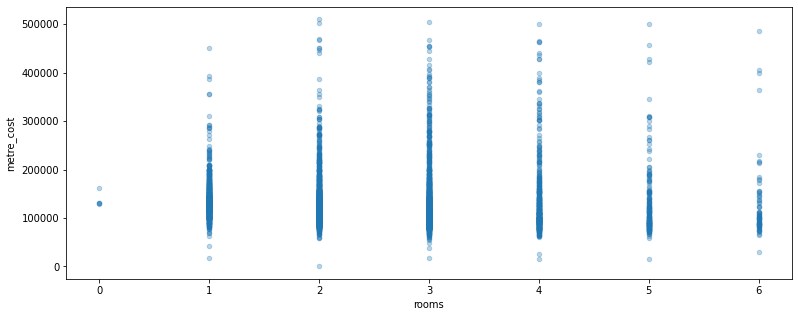

In [79]:
saint_p_centre.plot(x='rooms', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Видим примерно одинаковую стоимость квартир с разным количеством комнат.

<AxesSubplot:xlabel='city_centers_nearest', ylabel='metre_cost'>

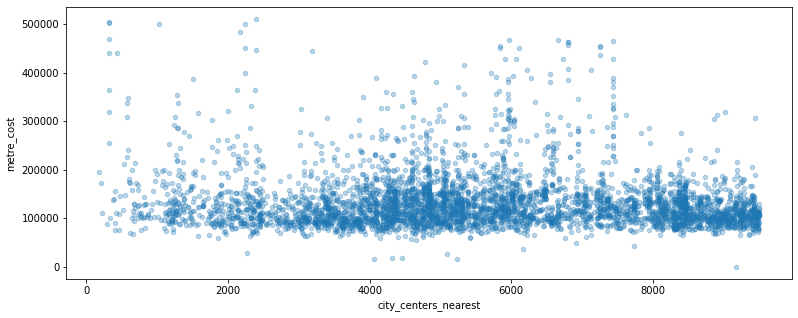

In [80]:
saint_p_centre.plot(x='city_centers_nearest', y='metre_cost', kind='scatter', alpha=0.3, figsize=(13,5))

Видим примерно похожие цены не зависимо от расстояния.

In [70]:
pivot(saint_p_centre, saint_p_centre['floor_category'])

,metre_cost
floor_category,
другой,136657.0
первый,117318.0
последний,129416.0


<AxesSubplot:xlabel='floor_category'>

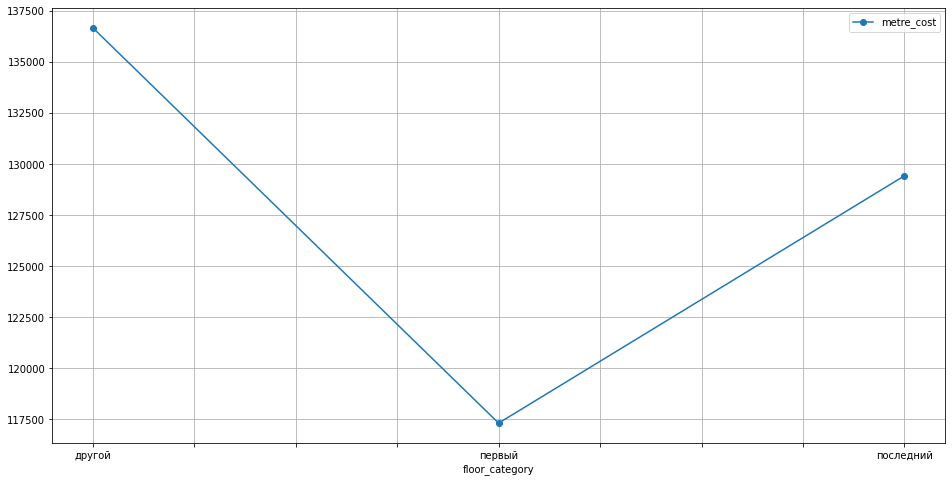

In [71]:
pivot(saint_p_centre, saint_p_centre['floor_category']).plot(style='o-', grid=True, figsize=(16, 8))

Мы видим зависимость цены от этажа. Средняя цена за квартиру на первом и последнем этажах ниже чем на других, причем на первом этаже покупать дешевле всего.

In [72]:
pivot(saint_p_centre, saint_p_centre['week_exposition'])

,metre_cost
week_exposition,
0,134341.0
1,133012.0
2,132130.0
3,131233.0
4,134596.0
5,136092.0
6,136753.0


<AxesSubplot:xlabel='week_exposition'>

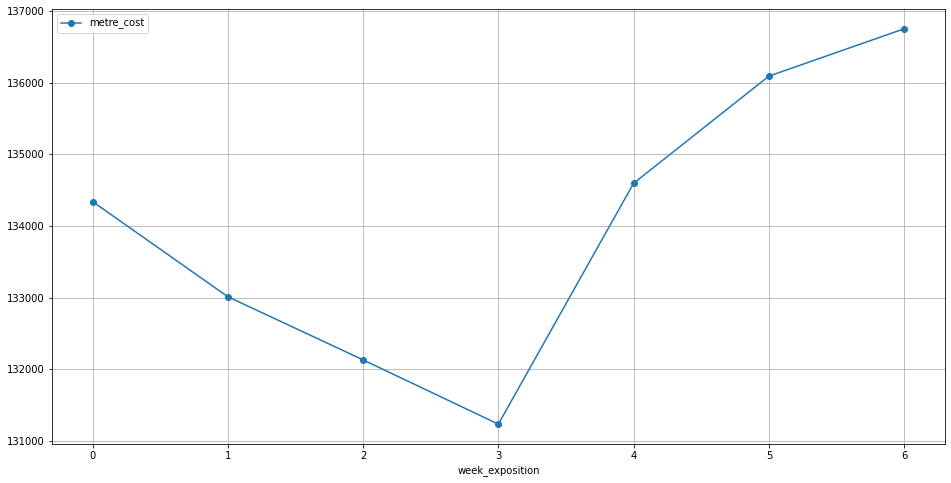

In [73]:
pivot(saint_p_centre, saint_p_centre['week_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Цена растет ближе к выходным, самая низкая - в четверг.

In [74]:
pivot(saint_p_centre, saint_p_centre['month_exposition'])

,metre_cost
month_exposition,
1,135377.0
2,134254.0
3,133689.0
4,132750.0
5,132293.0
6,136615.0
7,132494.0
8,136656.0
9,131400.0


<AxesSubplot:xlabel='month_exposition'>

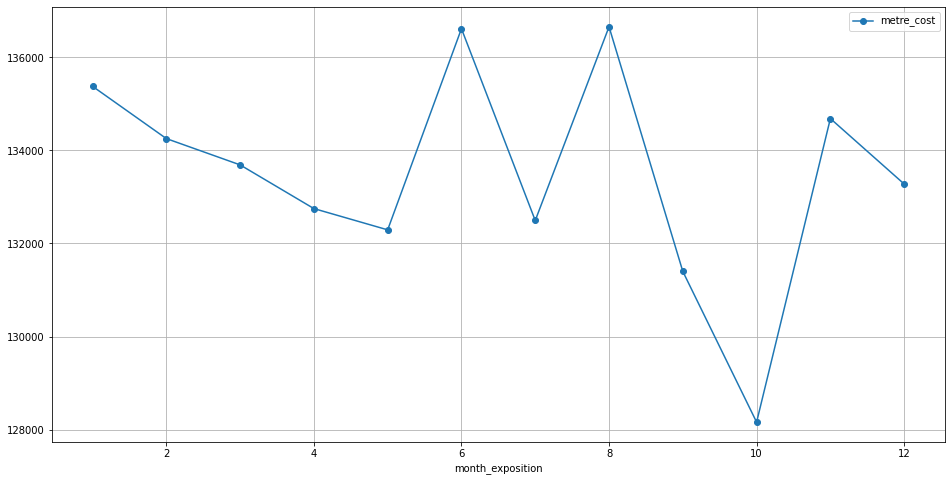

In [75]:
pivot(saint_p_centre, saint_p_centre['month_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Самая высокая средняя цена у объявлений, опубликованных в июне и августе, самая низкая - в октябре.

In [76]:
pivot(saint_p_centre, saint_p_centre['year_exposition'])

,metre_cost
year_exposition,
2014,177657.0
2015,133001.0
2016,135106.0
2017,130545.0
2018,131985.0
2019,141580.0


<AxesSubplot:xlabel='year_exposition'>

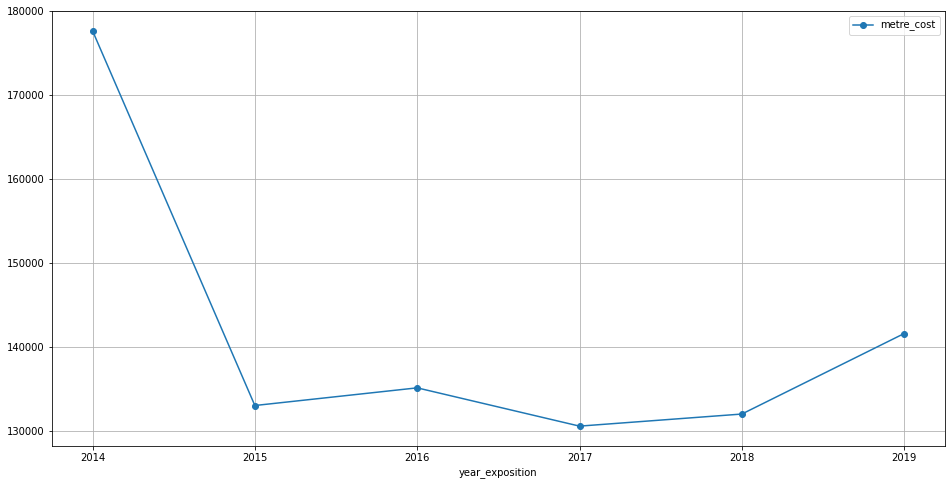

In [77]:
pivot(saint_p_centre, saint_p_centre['year_exposition']).plot(style='o-', grid=True, figsize=(16, 8))

Здесь мы видим, что цена росла каждый год, самая низкая - в 2015г, самая высокая - в 2019г.

## Общий вывод

Мы провели исследовательский анализ объявлений о продаже квартир, предоставленных с сарвиса Яндекс Недвижимость.

Были проанализированы показатели:
* площадь
* цена
* число комнат
* высота потолков 
* время продажи квартир

Были выявлены редкие и выбивающиеся значения, после очистки данных от них мы видим, что большинство значений площади - примерно от 30 до 50 кв.м., большое количество однокомнатных и двухкомнатных квартир, низкая доля высоких потолков, большинство квартир продается за первые 100 дней.

Также мы провели анализ тех же показателей, выбрав сегмент квартир, находящихся в центре Санкт-Петербурга. Данные показали, что большинство значений площади - примерно от 40 до 60 кв.м., меньше однокомнатных больше двух и трехкомнатных квартир, доля высоких потолков выше, большинство квартир продается за первые 100 дней. 

На основе данных были выявлены параметры, которые влияют на стоимость:
* этаж
* удаленность от центра
* день недели, месяц и год публикации объявления

Параметры сегмента квартир, находящихся в центре Санкт-Петербурга:
* этаж
* день недели, месяц и год публикации объявления